In [55]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [57]:
# preprocessing function

def preprocess_input(text):

    # segmenting text into tokens

    tokens = nltk.tokenize.word_tokenize(text)

    # filtering out stopwords like "the", "is", "and", "of"

    # lemmatising words to their base form

    lemmatizer = nltk.stem.WordNetLemmatizer()

    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]

    processed = " ".join(tokens_lemmatized)

    return processed

In [ ]:
nltk.download('vader_lexicon')

# using the vader sentiment analyzer 

analyzer = SentimentIntensityAnalyzer()

# analyzing scores

def analysis(text, compound_score_threshold):

    sentiment_score = analyzer.polarity_scores(text)
    sentiment = 1 if sentiment_score['compound'] > compound_score_threshold else 0

    return sentiment
    

In [59]:

import pandas as pd

In [62]:
# loading test dataset

df = pd.read_csv("test.csv")

df

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [63]:
# applying the preprocessing function to the dataset

df['text'] = df['text'].apply(preprocess_input)

In [64]:
import sklearn.metrics
import numpy

In [65]:
# applying analysis, checking accuracies

threshold_trials = numpy.arange(-1, 1.1, 0.1)

accuracy_scores = []

for threshold in threshold_trials:
    df['sentiment_score'] = df['text'].apply(lambda x: analysis(x, threshold))
    accuracy_scores.append(sklearn.metrics.accuracy_score(df['label'], df['sentiment_score']))


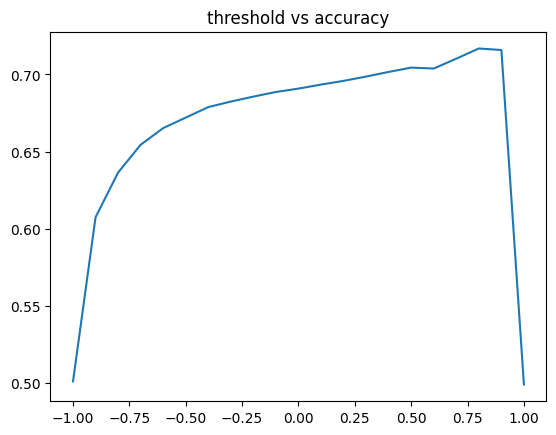

In [66]:
# plotting

import matplotlib.pyplot as plt

plt.plot(threshold_trials, accuracy_scores) 
plt.title('threshold vs accuracy')
plt.show()

In [69]:
# displays the threshold corressponding to the max accuracy

max_accuracy_threshold = threshold_trials[accuracy_scores.index(max(accuracy_scores))]
print(max_accuracy_threshold)
print(max(accuracy_scores))

# this threshold seems quite high. this will likely hold up better for longer, comprehensive texts with a consistent emotion judging by the nature of the dataset

0.7999999999999996
0.7168


In [70]:
# confusion matrix

df['sentiment_score'] = df['text'].apply(lambda x: analysis(x, max_accuracy_threshold))
print(sklearn.metrics.confusion_matrix(df['label'], df['sentiment_score']))

[[1710  785]
 [ 631 1874]]
